#Wisconsin Breast Cancer Prediction with LightGBM

In [1]:
# Import LightGBMClassifier from LightGBM package (scikit-learn wrapper)
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
cancer_df['target']= dataset.target

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
# Extract feature columns and target columns
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# train_test_split (80% train & 20% test)
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2)

# train_validation_split (90% train & 10% validation) 
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train,
                                         test_size=0.1)

In [4]:
# Construct LightGBMClassifier

lgbm = LGBMClassifier(n_estimators=400, learning_rate=0.05)

# Train the classifier with early_stopping option
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm.fit(X_tr,y_tr, early_stopping_rounds=30, eval_metric="logloss", eval_set=evals, verbose=True)

[1]	training's binary_logloss: 0.621332	training's binary_logloss: 0.621332	valid_1's binary_logloss: 0.615679	valid_1's binary_logloss: 0.615679
Training until validation scores don't improve for 30 rounds.
[2]	training's binary_logloss: 0.585796	training's binary_logloss: 0.585796	valid_1's binary_logloss: 0.5771	valid_1's binary_logloss: 0.5771
[3]	training's binary_logloss: 0.553789	training's binary_logloss: 0.553789	valid_1's binary_logloss: 0.542269	valid_1's binary_logloss: 0.542269
[4]	training's binary_logloss: 0.524767	training's binary_logloss: 0.524767	valid_1's binary_logloss: 0.510613	valid_1's binary_logloss: 0.510613
[5]	training's binary_logloss: 0.499058	training's binary_logloss: 0.499058	valid_1's binary_logloss: 0.482689	valid_1's binary_logloss: 0.482689
[6]	training's binary_logloss: 0.474286	training's binary_logloss: 0.474286	valid_1's binary_logloss: 0.456434	valid_1's binary_logloss: 0.456434
[7]	training's binary_logloss: 0.450006	training's binary_logloss:

LGBMClassifier(learning_rate=0.05, n_estimators=400)

In [5]:
# Prediction with test dataset
preds = lgbm.predict(X_test)
pred_proba = lgbm.predict_proba(X_test)[:, 1]

In [6]:
# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def evaluate_model(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred) 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

evaluate_model(y_test, preds, pred_proba)

Confusion Matrix
[[40  2]
 [ 1 71]]
Accuracy: 0.9737, Precision: 0.9726, Recall: 0.9861,    F1: 0.9793, AUC:0.9901


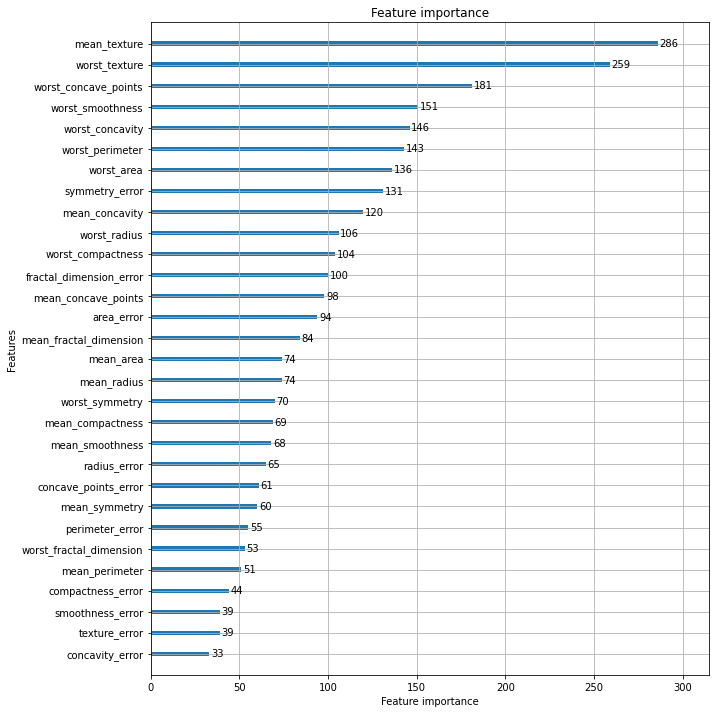

In [8]:
# Visialize feature importance
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm,ax=ax)
plt.show()